## SRFP AQI data extra plots for Hyderabad city

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_theme(style="whitegrid", color_codes=True)

In [2]:
from functions import rplot, qqplot

In [3]:
dfmod = pd.read_csv('data/hyderabad_mod.csv')
dfobs = pd.read_csv('data/hyderabad_obs.csv')

In [4]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

In [5]:
dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [6]:
dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

In [8]:
dfobs.head()

,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime
datetime,,,,,
2020-10-31 01:00:00,80.33,6.59,176.80,5.36,2020-10-31 01:00:00
2020-10-31 02:00:00,81.17,7.44,171.80,10.47,2020-10-31 02:00:00
2020-10-31 03:00:00,82.00,6.10,165.60,14.14,2020-10-31 03:00:00
2020-10-31 04:00:00,84.80,9.98,157.75,16.94,2020-10-31 04:00:00
2020-10-31 05:00:00,86.60,4.83,152.75,23.20,2020-10-31 05:00:00


In [10]:
dfobs.isna().sum()

obs_PM2.5          203
obs_PM2.5_stdev    204
obs_PM10           177
obs_PM10_stdev     240
datetime             0
dtype: int64

In [11]:
# Do interpolatoin of the observed data

dfobs = dfobs.interpolate(method = 'time')

In [12]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

In [13]:
df = pd.concat([dfmod, dfobs], axis=1)

In [14]:
dfnov = df.loc["2020-11-01":"2020-11-30"]
dfdec = df.loc["2020-12-01":"2020-12-31"]
dfjan = df.loc["2021-01-01":"2021-01-31"]

In [15]:
dfnov.tail()

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime
datetime,,,,,,,,,,
2020-11-30 19:00:00,89.91,11.00,153.69,18.88,2020-11-30 19:00:00,43.60,24.17,83.50,38.80,2020-11-30 19:00:00
2020-11-30 20:00:00,91.78,11.16,156.86,19.13,2020-11-30 20:00:00,46.00,20.19,85.50,32.96,2020-11-30 20:00:00
2020-11-30 21:00:00,96.19,15.36,164.41,26.36,2020-11-30 21:00:00,50.60,23.09,103.00,36.83,2020-11-30 21:00:00
2020-11-30 22:00:00,96.45,17.87,164.86,30.78,2020-11-30 22:00:00,42.33,4.16,92.00,28.16,2020-11-30 22:00:00
2020-11-30 23:00:00,82.54,13.24,140.03,22.94,2020-11-30 23:00:00,45.25,9.32,79.33,6.51,2020-11-30 23:00:00


### Q-Q plot

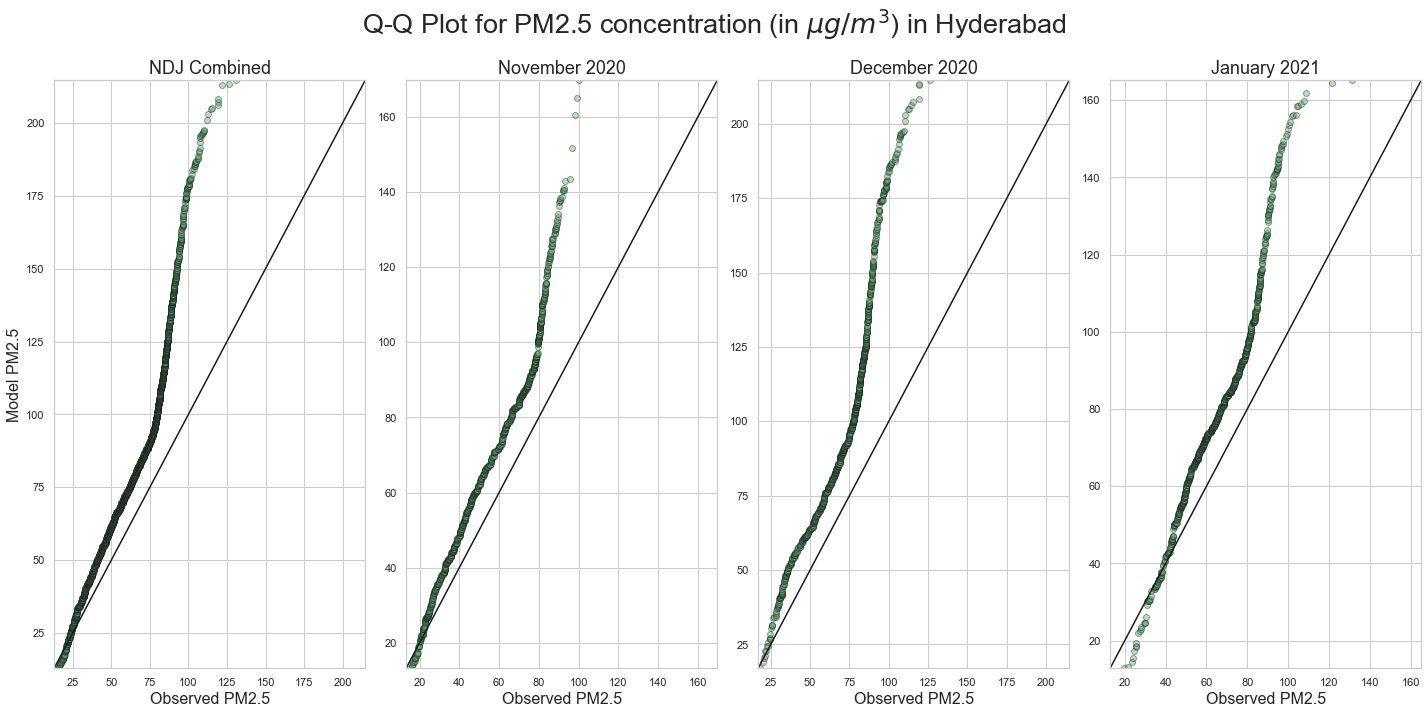

In [16]:
# Q-Q plot for PM2.5 concentration

fig = plt.figure(figsize=(20,10))

plt.subplot(141)
qqplot.plot(df['obs_PM2.5'], df['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
plt.ylabel('Model PM2.5', fontsize=16)
plt.title('NDJ Combined',fontsize=18)

plt.subplot(142)
qqplot.plot(dfnov['obs_PM2.5'], dfnov['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('November 2020', fontsize=18)

plt.subplot(143)
qqplot.plot(dfdec['obs_PM2.5'], dfdec['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('December 2020', fontsize=18)

plt.subplot(144)
qqplot.plot(dfjan['obs_PM2.5'], dfjan['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('January 2021', fontsize=18)

fig.suptitle('Q-Q Plot for PM2.5 concentration (in $\mu g/m^3$) in Hyderabad', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/qqplot.plot25.png')

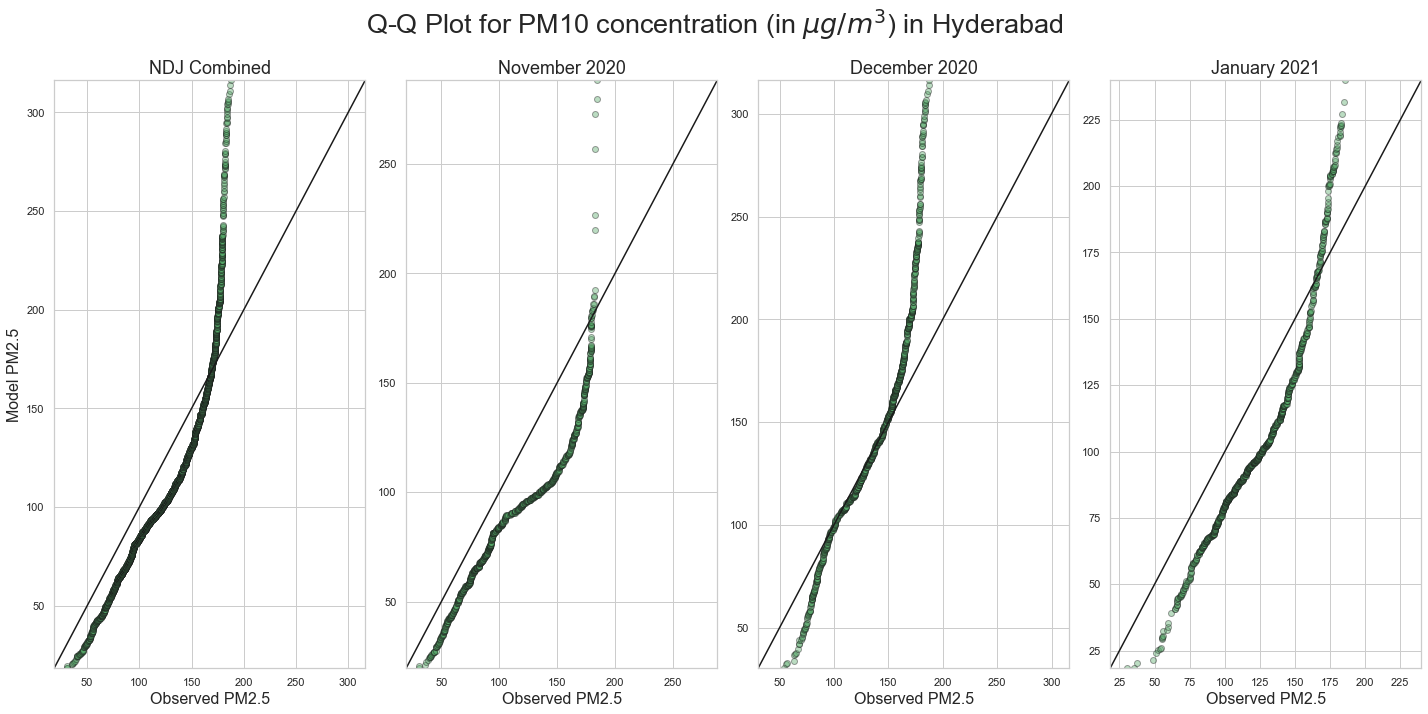

In [17]:
# Q-Q plot for PM10 concentration

fig = plt.figure(figsize=(20,10))

plt.subplot(141)
qqplot.plot(df['obs_PM10'], df['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
plt.ylabel('Model PM2.5', fontsize=16)
plt.title('NDJ Combined',fontsize=18)

plt.subplot(142)
qqplot.plot(dfnov['obs_PM10'], dfnov['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('November 2020', fontsize=18)

plt.subplot(143)
qqplot.plot(dfdec['obs_PM10'], dfdec['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('December 2020', fontsize=18)

plt.subplot(144)
qqplot.plot(dfjan['obs_PM10'], dfjan['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('January 2021', fontsize=18)

fig.suptitle('Q-Q Plot for PM10 concentration (in $\mu g/m^3$) in Hyderabad', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/qqplot.plot10.png')

### Scatter - Correlation Plot

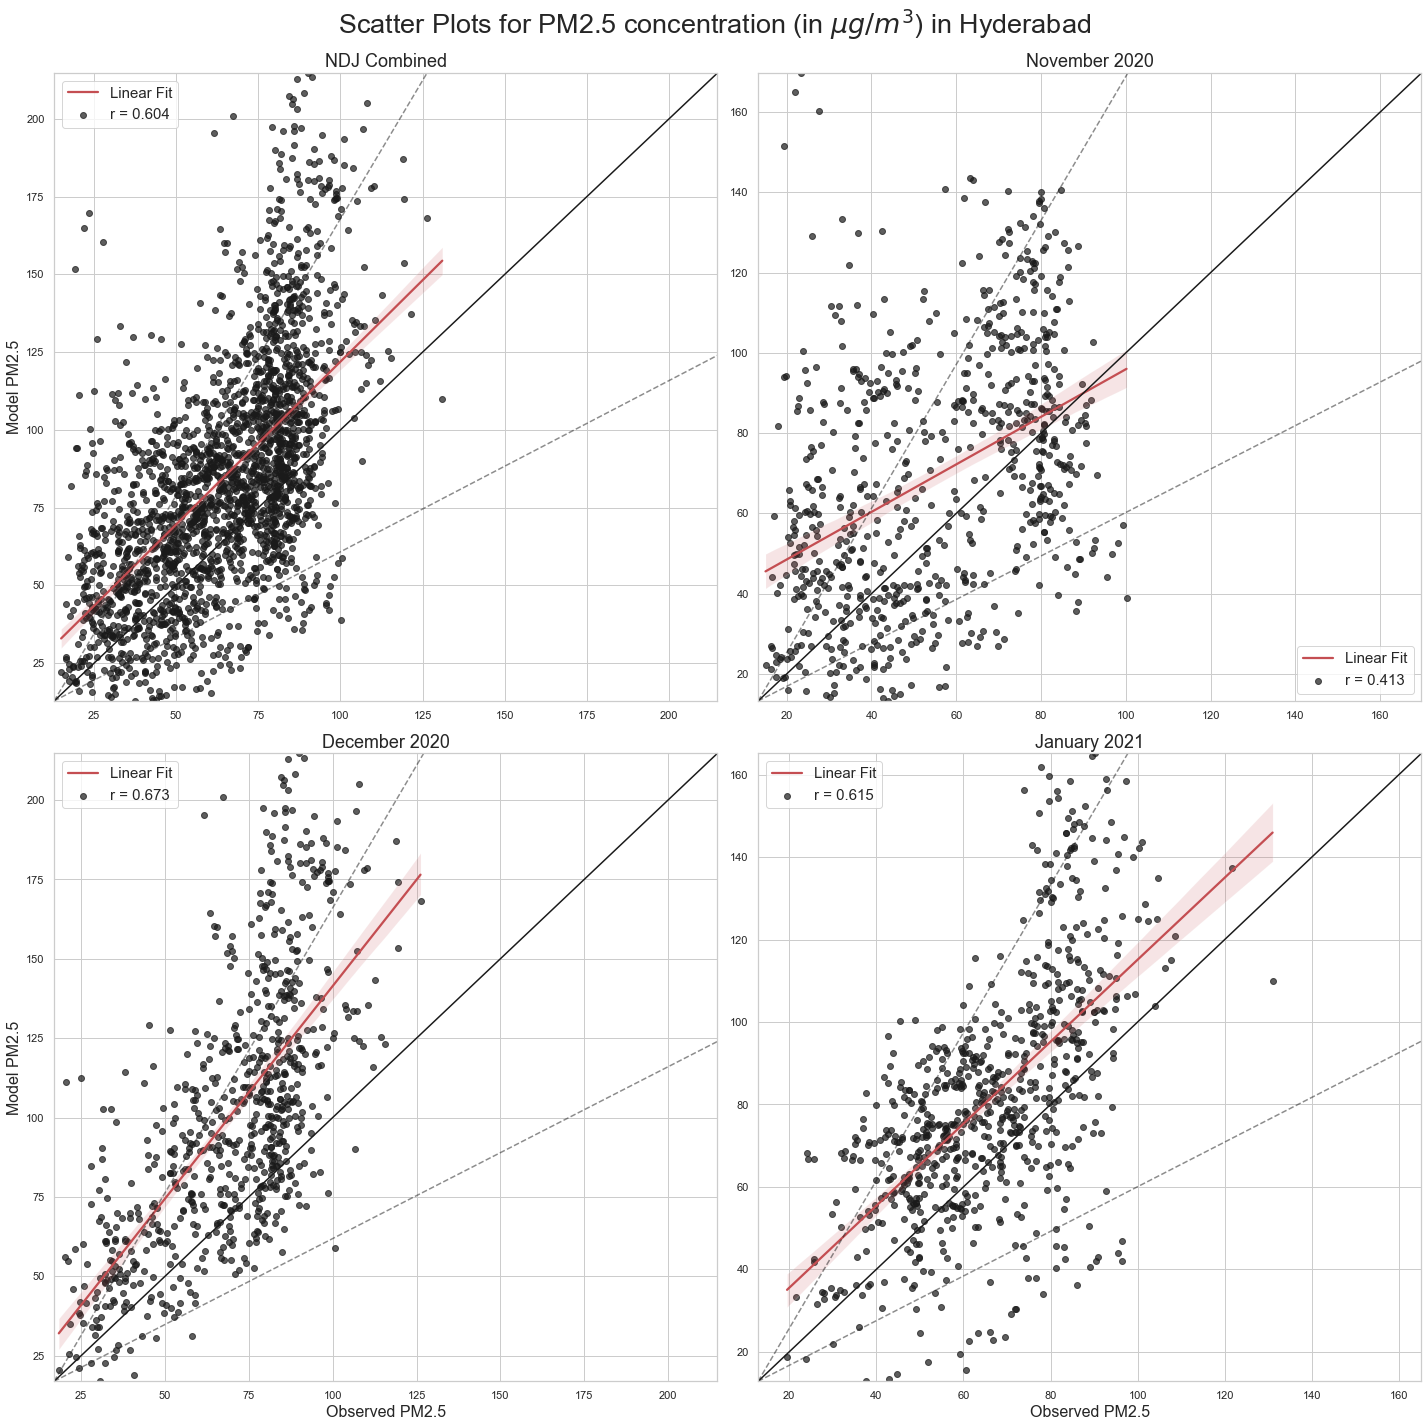

In [18]:
# Scatter-Correlation plot for PM2.5 concentration

fig = plt.figure(figsize=(20,20))

plt.subplot(221)
rplot.plot(df, df['obs_PM2.5'], df['mod_PM2.5'], color='k', alpha=0.7)
# plt.xlabel('Observed PM2.5', fontsize=16)
plt.ylabel('Model PM2.5', fontsize=16)
plt.title('NDJ Combined',fontsize=18)

plt.subplot(222)
rplot.plot(dfnov, dfnov['obs_PM2.5'], dfnov['mod_PM2.5'], color='k', alpha=0.7)
# plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('November 2020', fontsize=18)

plt.subplot(223)
rplot.plot(dfdec, dfdec['obs_PM2.5'], dfdec['mod_PM2.5'], color='k', alpha=0.7)
plt.xlabel('Observed PM2.5', fontsize=16)
plt.ylabel('Model PM2.5', fontsize=16)
plt.title('December 2020', fontsize=18)

plt.subplot(224)
rplot.plot(dfdec, dfjan['obs_PM2.5'], dfjan['mod_PM2.5'], color='k', alpha=0.7)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('January 2021', fontsize=18)

fig.suptitle('Scatter Plots for PM2.5 concentration (in $\mu g/m^3$) in Hyderabad', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/rplot.plot25.png')

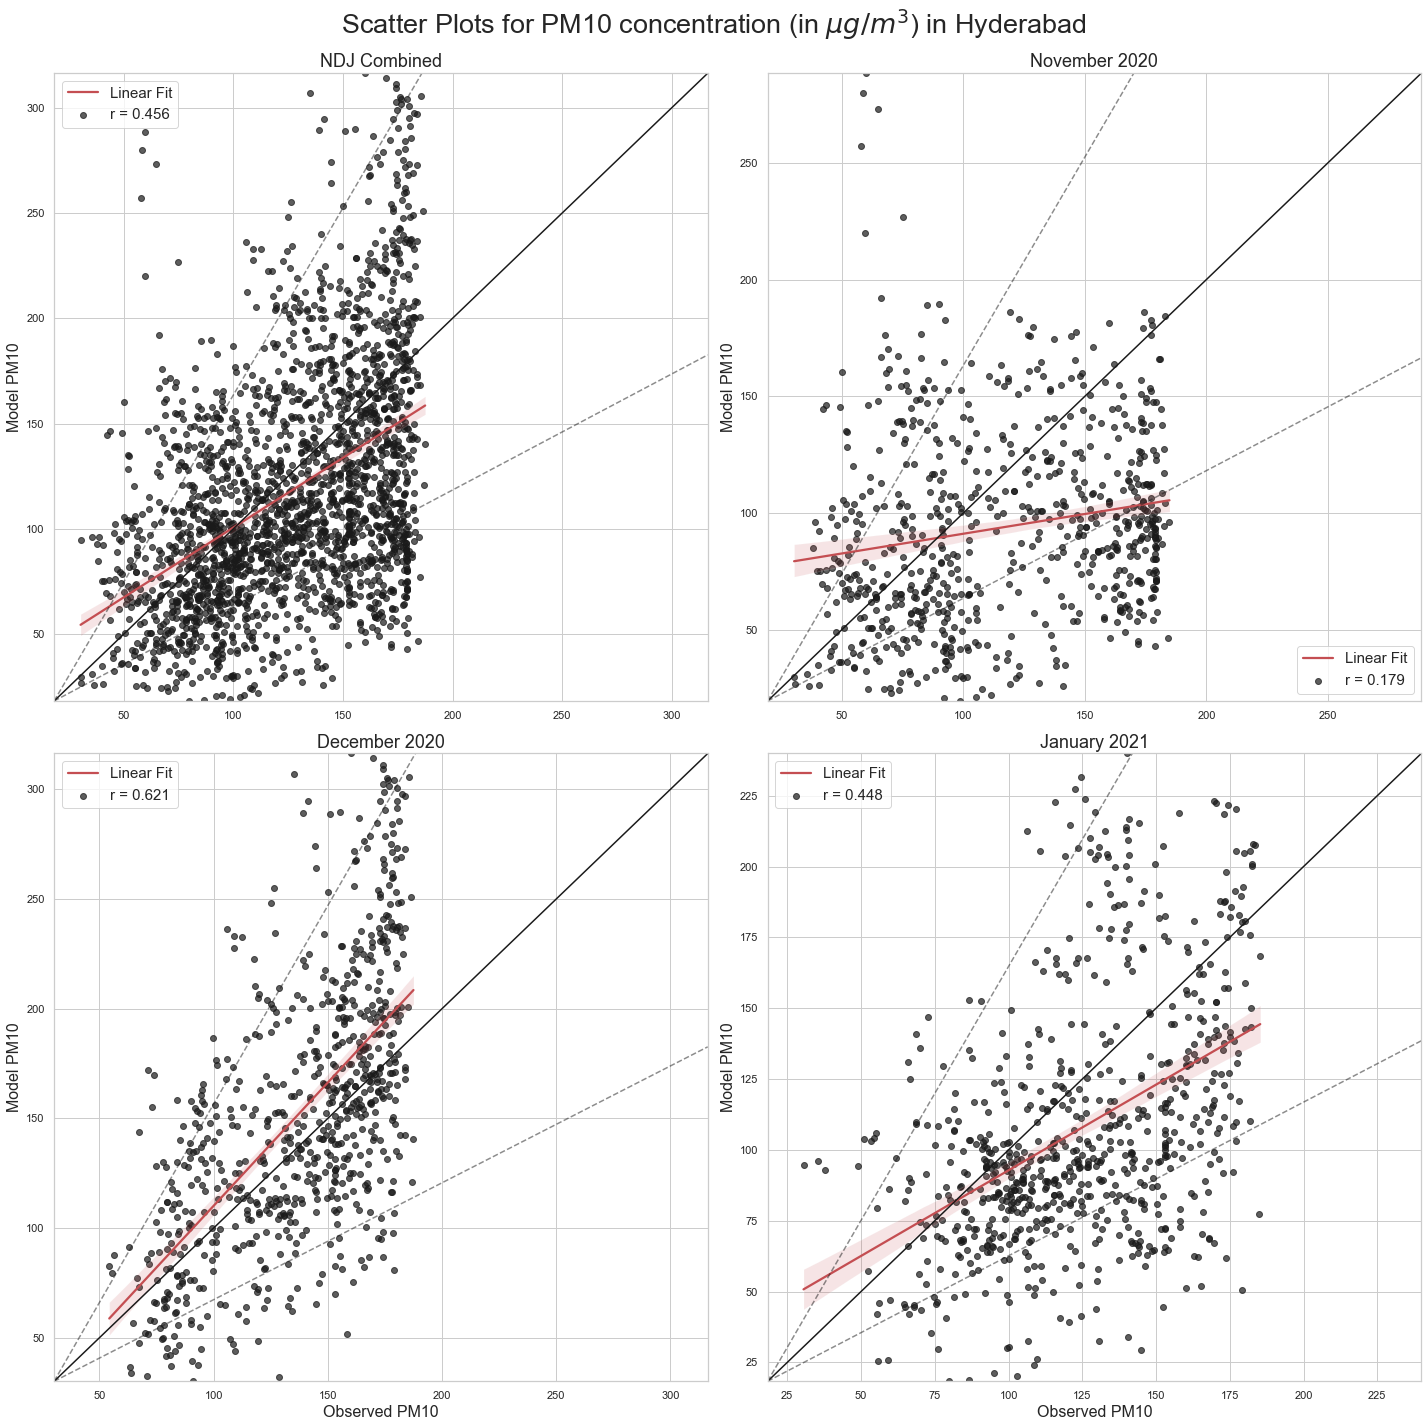

In [19]:
# Scatter-Correlation plot for PM10 concentration

fig = plt.figure(figsize=(20,20))

plt.subplot(221)
rplot.plot(df, df['obs_PM10'], df['mod_PM10'], color='k', alpha=0.7)
# plt.xlabel('Observed PM10', fontsize=16)
plt.ylabel('Model PM10', fontsize=16)
plt.title('NDJ Combined',fontsize=18)

plt.subplot(222)
rplot.plot(dfnov, dfnov['obs_PM10'], dfnov['mod_PM10'], color='k', alpha=0.7)
# plt.xlabel('Observed PM10', fontsize=16)
plt.ylabel('Model PM10', fontsize=16)
plt.title('November 2020', fontsize=18)

plt.subplot(223)
rplot.plot(dfdec, dfdec['obs_PM10'], dfdec['mod_PM10'], color='k', alpha=0.7)
plt.xlabel('Observed PM10', fontsize=16)
plt.ylabel('Model PM10', fontsize=16)
plt.title('December 2020', fontsize=18)

plt.subplot(224)
rplot.plot(dfdec, dfjan['obs_PM10'], dfjan['mod_PM10'], color='k', alpha=0.7)
plt.xlabel('Observed PM10', fontsize=16)
plt.ylabel('Model PM10', fontsize=16)
plt.title('January 2021', fontsize=18)

fig.suptitle('Scatter Plots for PM10 concentration (in $\mu g/m^3$) in Hyderabad', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/rplot.plot10.png')